In [1]:
!conda create -p env -y

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\hp\Desktop\DLCV\mnist\env



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate c:\Users\hp\Desktop\DLCV\mnist\env
#
# To deactivate an active environment, use
#
#     $ conda deactivate





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [2]:
!conda activate c:\Users\hp\Desktop\DLCV\mnist\env

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl (377.0 MB)


In [19]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense,Flatten

In [7]:
data=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
len(data)

2

In [12]:
(x_train,y_train),(x_test,y_test)=data

In [13]:
x_train.shape

(60000, 28, 28)

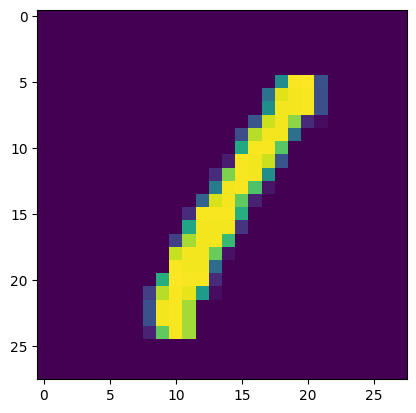

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [15]:
x_train=x_train/255
x_test=x_test/255

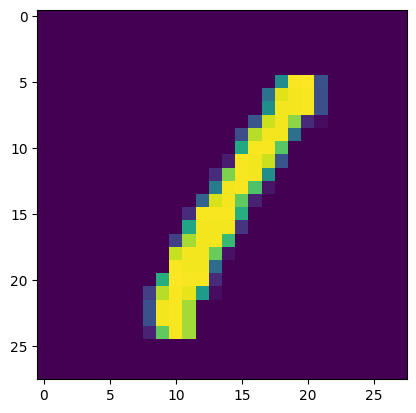

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [17]:
x_test[0].shape

(28, 28)

In [23]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [35]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0608 - val_accuracy: 0.9717 - val_loss: 0.0970
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0545 - val_accuracy: 0.9709 - val_loss: 0.0988
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0547 - val_accuracy: 0.9718 - val_loss: 0.0957
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0516 - val_accuracy: 0.9730 - val_loss: 0.0939
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0525 - val_accuracy: 0.9732 - val_loss: 0.0929
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0436 - val_accuracy: 0.9739 - val_loss: 0.0911
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0443 - val_accuracy: 0.9747 - val_loss: 0.0904
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0420 - 

In [36]:
history.history

{'accuracy': [0.9836666584014893,
  0.9850208163261414,
  0.9854583144187927,
  0.9861249923706055,
  0.9869375228881836,
  0.9877708554267883,
  0.9885625243186951,
  0.9890000224113464,
  0.9900624752044678,
  0.9904166460037231,
  0.9907291531562805,
  0.9914583563804626,
  0.991895854473114,
  0.9925000071525574,
  0.9928749799728394,
  0.9934583306312561,
  0.9942916631698608,
  0.9941874742507935,
  0.9947916865348816,
  0.9950624704360962,
  0.995437502861023,
  0.9958124756813049,
  0.9960416555404663,
  0.9961875081062317,
  0.9965833425521851,
  0.996666669845581,
  0.997041642665863,
  0.9973333477973938,
  0.9976041913032532,
  0.9976666569709778,
  0.9978125095367432,
  0.9979583621025085,
  0.9980208277702332,
  0.9982083439826965,
  0.9984999895095825,
  0.9986249804496765,
  0.9986666440963745,
  0.9988750219345093,
  0.9988958239555359,
  0.9991250038146973,
  0.9991458058357239,
  0.9993333220481873,
  0.9992708563804626,
  0.9992708563804626,
  0.9993958473205566,
  

In [37]:
import pandas as pd

In [38]:
pd=pd.DataFrame(history.history)

In [39]:
pd['loss+accuracy']=pd['loss']+pd['accuracy']
pd

,accuracy,loss,val_accuracy,val_loss,loss+accuracy
0,0.983667,0.059056,0.971667,0.096951,1.042723
1,0.985021,0.056058,0.970917,0.098779,1.041078
2,0.985458,0.053247,0.971833,0.095717,1.038705
3,0.986125,0.050651,0.973000,0.093922,1.036776
4,0.986938,0.048131,0.973167,0.092909,1.035069
5,0.987771,0.045873,0.973917,0.091061,1.033644
6,0.988563,0.043950,0.974750,0.090428,1.032512
7,0.989000,0.041728,0.974083,0.091456,1.030728
8,0.990062,0.039432,0.973667,0.092026,1.029494
9,0.990417,0.037891,0.974250,0.090694,1.028307


In [40]:
y_prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
y_pred=y_prob.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

In [43]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])

NameError: name 'df' is not defined